<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Handwriiten_digits_recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model  
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

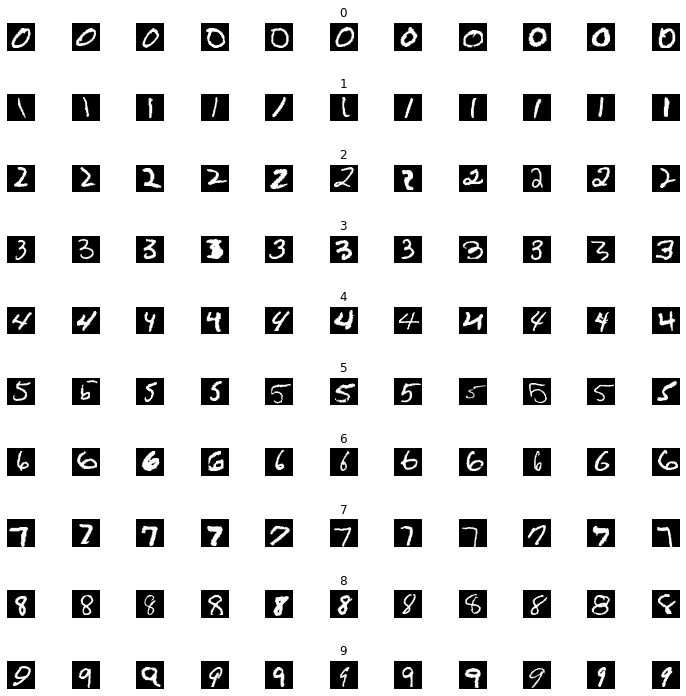

In [6]:
num_of_samples = []
cols=11
num_classes=10

fig,axs = plt.subplots(nrows=num_classes,ncols = cols, figsize=(10,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==5:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'no.of images')

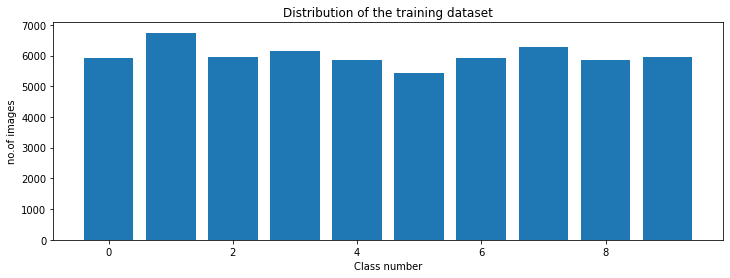

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("no.of images")

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
  return model

In [12]:
model=leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               